# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [37]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [38]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [39]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



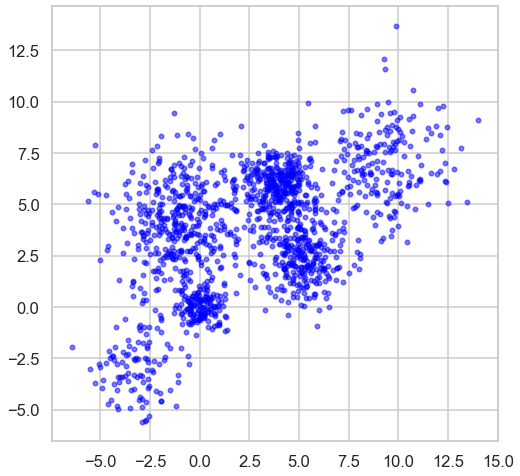

In [40]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [41]:
from sklearn.cluster import KMeans

n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(Multi_blob_Data)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")


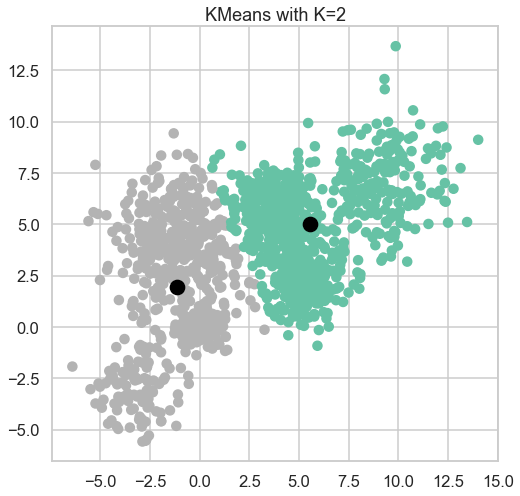

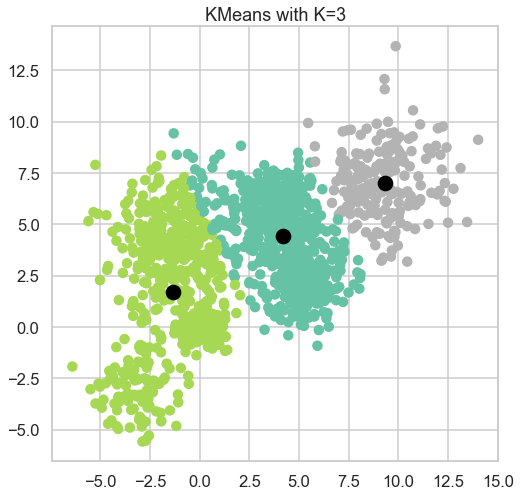

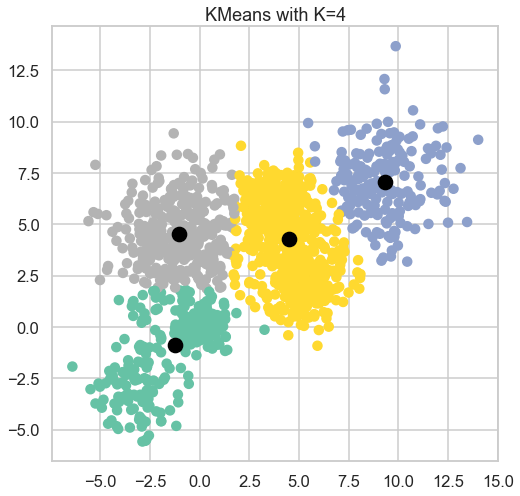

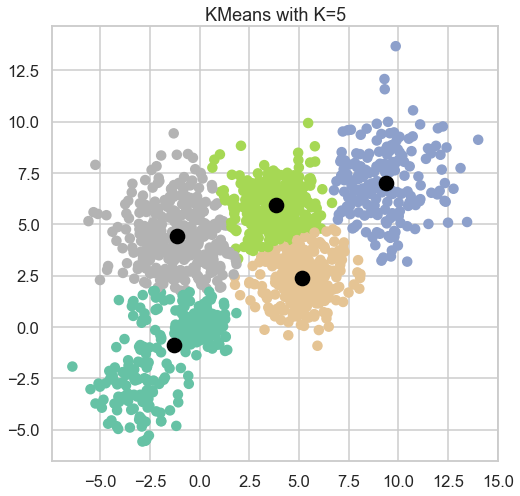

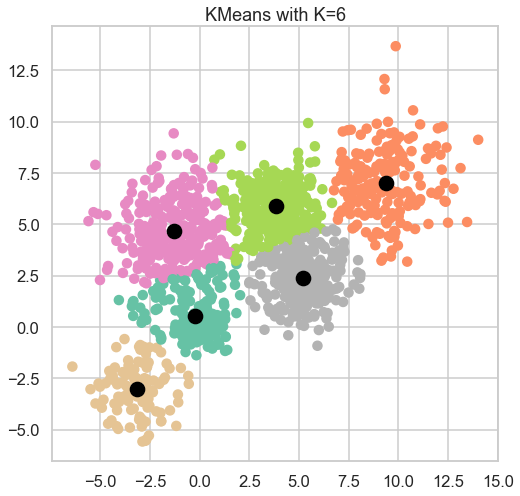

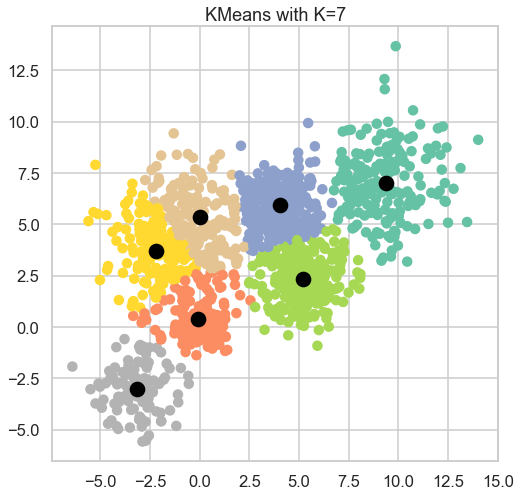

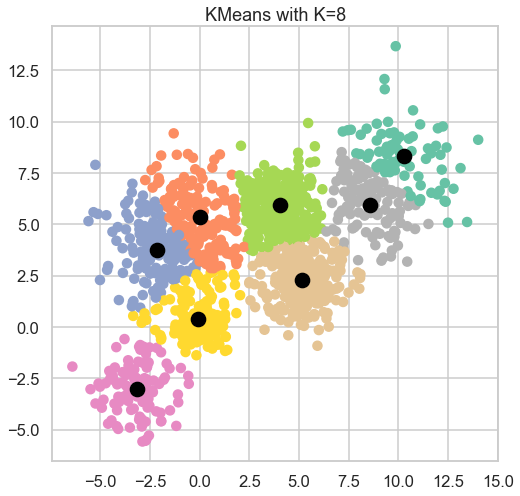

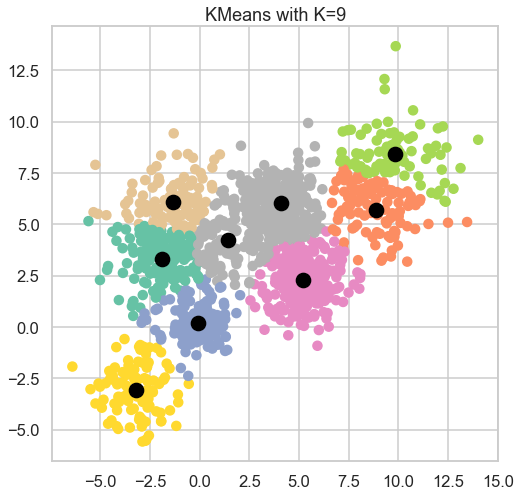

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create a list of different values of K
Ks = range(2, 10)

# Initialize an empty list to store the distortion values for each value of K
distortions = []

# Initialize an empty list to store the silhouette scores for each value of K
silhouette_scores = []

# Loop over the different values of K
for K in Ks:
    # Initialize KMeans with the current value of K
    kmeans = KMeans(n_clusters=K, random_state=42)
    
    # Fit KMeans to the data
    kmeans.fit(Multi_blob_Data)
    
    # Append the distortion value to the list
    distortions.append(kmeans.inertia_)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(Multi_blob_Data, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Plot the clustering results for the current value of K
    plt.figure()
    plt.title("KMeans with K={}".format(K))
    plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=kmeans.labels_, cmap="Set2")
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='o', s=200, color='black')
    plt.show()

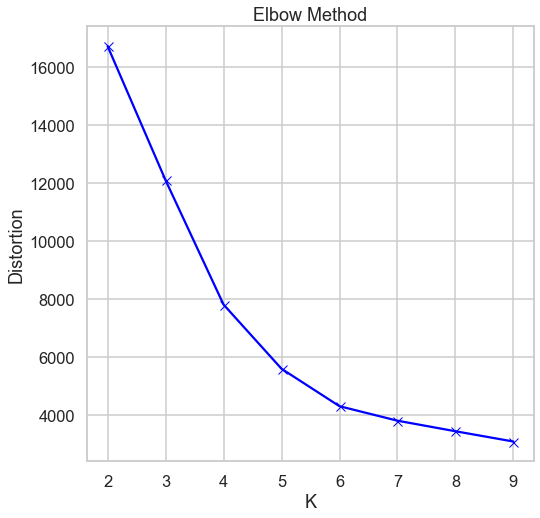

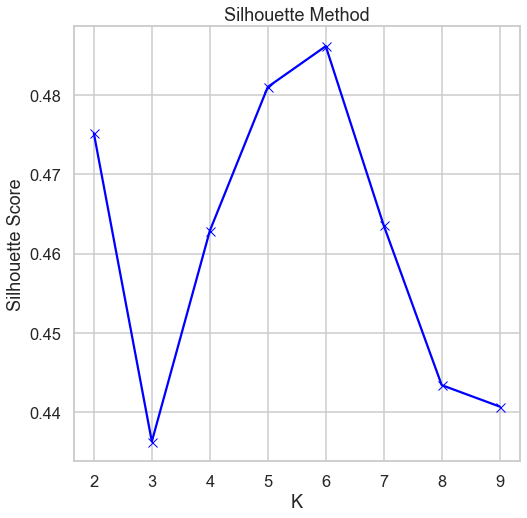

In [44]:
plt.plot(Ks, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

plt.plot(Ks, silhouette_scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

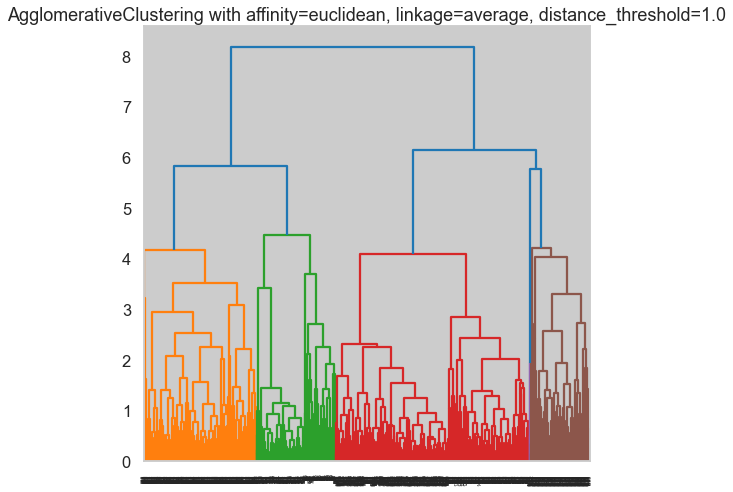

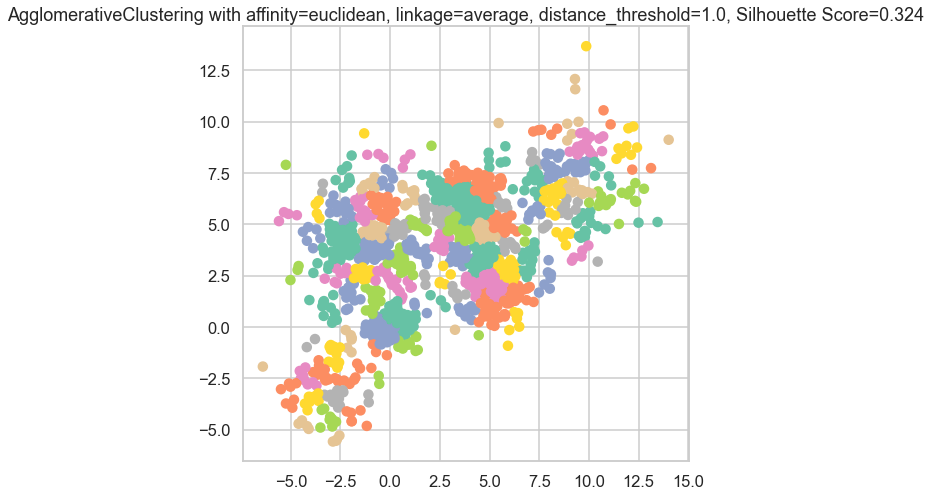

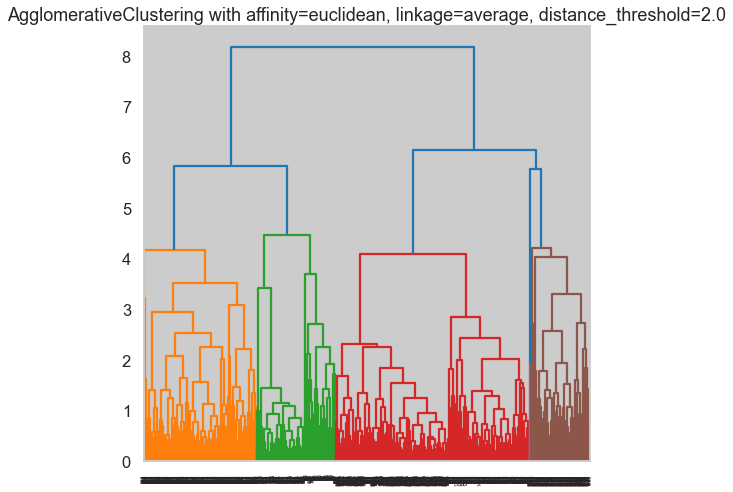

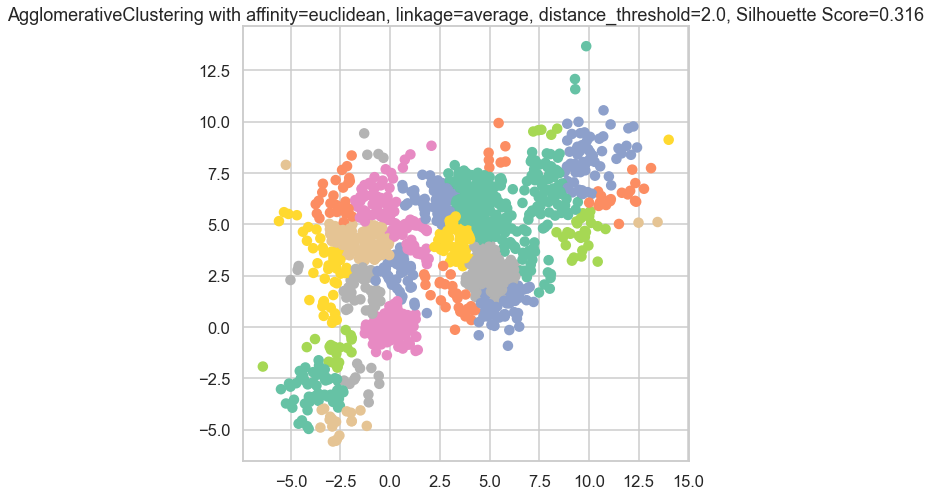

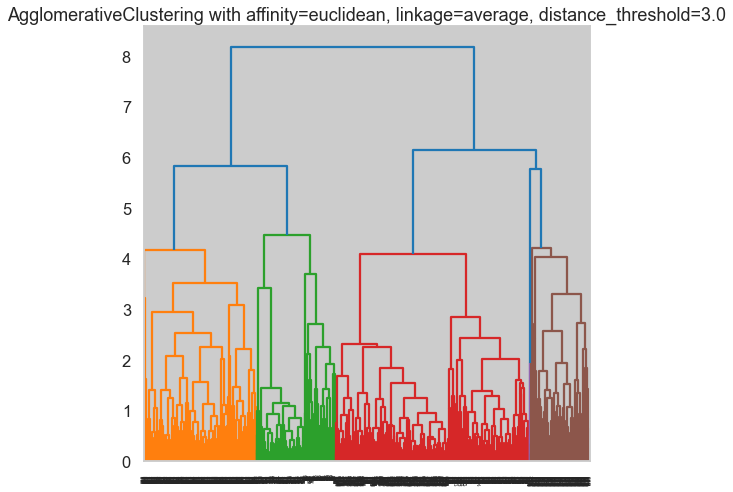

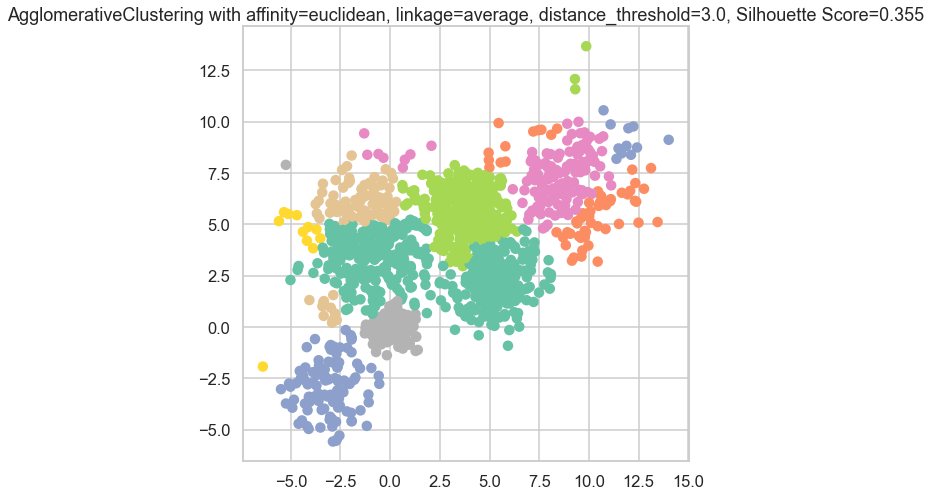

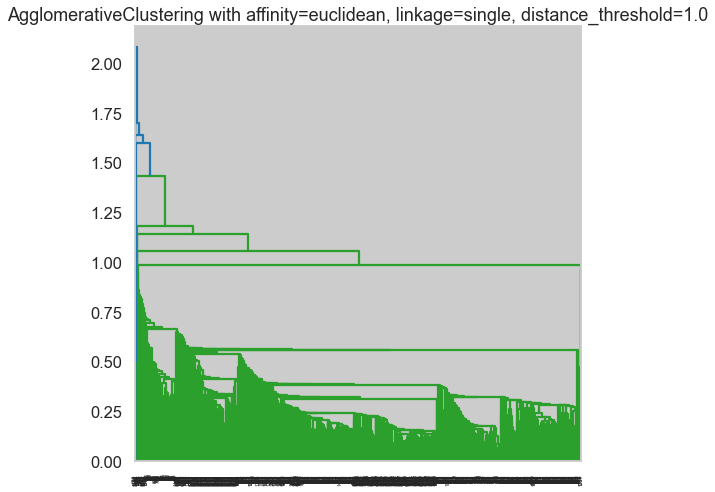

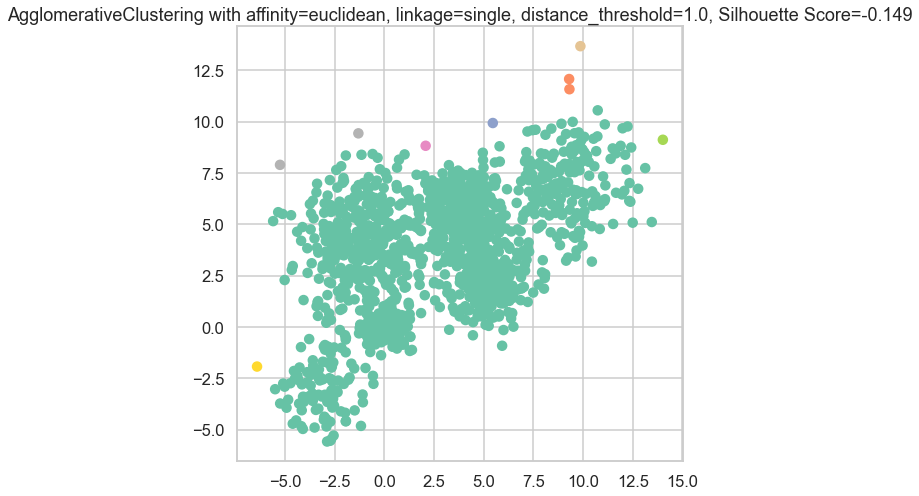

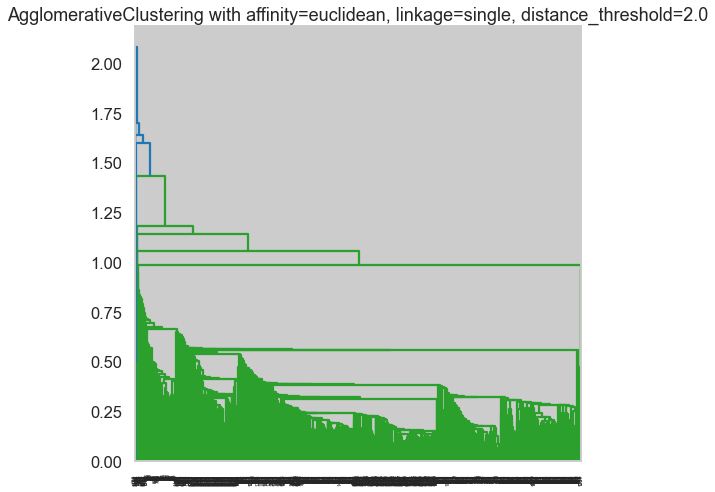

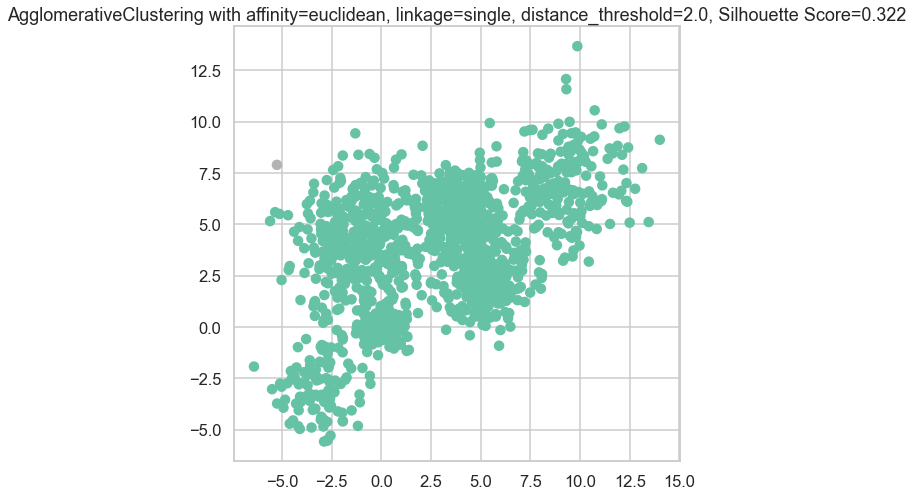

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [45]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create lists of different parameter values to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
distance_thresholds = [1.0, 2.0, 3.0]

# Initialize an empty list to store the silhouette scores for each parameter combination
silhouette_scores = []

# Loop over the different parameter combinations
for affinity in affinities:
    for linkage_type in linkages:
        for threshold in distance_thresholds:
            # Initialize AgglomerativeClustering with the current parameter values
            clustering = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage_type, distance_threshold=threshold)
            
            # Fit AgglomerativeClustering to the data and calculate the silhouette score
            clustering.fit(Multi_blob_Data)
            score = silhouette_score(Multi_blob_Data, clustering.labels_)
            silhouette_scores.append(score)
            
            # Plot the dendrogram for the current parameter values
            plt.figure()
            plt.title("AgglomerativeClustering with affinity={}, linkage={}, distance_threshold={}".format(affinity, linkage_type, threshold))
            dendrogram(linkage(Multi_blob_Data, method=linkage_type, metric=affinity))
            plt.show()
            
            # Plot the clustering results for the current parameter values
            plt.figure()
            plt.title("AgglomerativeClustering with affinity={}, linkage={}, distance_threshold={}, Silhouette Score={:.3f}".format(affinity, linkage_type, threshold, score))
            plt.scatter(Multi_blob_Data[:,0], Multi_blob_Data[:,1], c=clustering.labels_, cmap="Set2")
            plt.show()


In [ ]:
best_idx = np.argmax(silhouette_scores)
best_affinity = affinities[best_idx // (len(linkages) * len(distance_thresholds))]
best_linkage = linkages[(best_idx // len(distance_thresholds)) % len(linkages)]
best_threshold = distance_thresholds[best_idx % len(distance_thresholds)]
best_score = silhouette_scores[best_idx]

print("Best parameters: affinity={}, linkage={}, distance_threshold={}".format(best_affinity, best_linkage, best_threshold))
print("Best silhouette score: {:.3f}".format(best_score))


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_range = np.arange(0.1, 3.1, 0.1)
min_samples_range = np.arange(5, 26, 1)

best_score = -1
best_clusters = None
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(Multi_blob_Data)
        score = silhouette_score(Multi_blob_Data, clusters)
        if score > best_score:
            best_score = score
            best_clusters = clusters
            best_eps = eps
            best_min_samples = min_samples

print(f"Best silhouette_score: {best_score:.3f} with eps={best_eps:.1f} and min_samples={best_min_samples}")


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

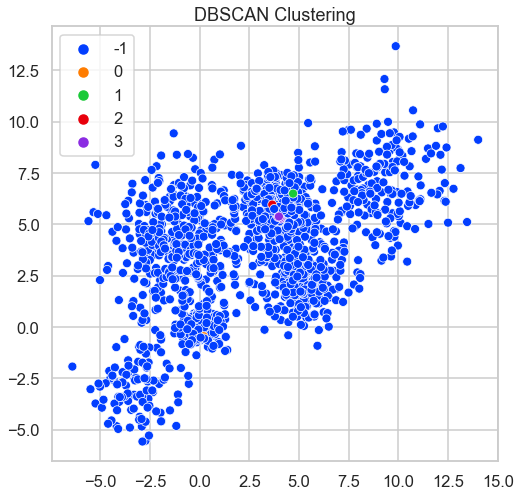

In [49]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=Multi_blob_Data[:,0], y=Multi_blob_Data[:,1], hue=best_clusters, palette='bright')
plt.title("DBSCAN Clustering")
plt.show()


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [50]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

covariance_types = ['full', 'tied', 'diag', 'spherical']

best_score = -np.inf
best_gmm = None

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=6, covariance_type=cov_type)
    gmm.fit(Multi_blob_Data)
    score = gmm.score(Multi_blob_Data)
    if score > best_score:
        best_score = score
        best_gmm = gmm

print(f"Best log-likelihood score: {best_score:.3f} with covariance_type={best_gmm.covariance_type}")


Best log-likelihood score: -4.769 with covariance_type=full


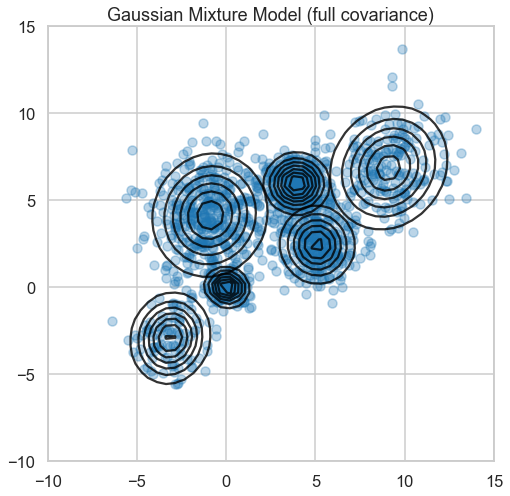

In [51]:
def plot_gmm(gmm, X):
    x, y = np.meshgrid(np.linspace(-10, 15), np.linspace(-10, 15))
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(X[:, 0], X[:, 1], alpha=0.3)
    ax.set_xlim([-10, 15])
    ax.set_ylim([-10, 15])
    for i in range(gmm.n_components):
        covariances = gmm.covariances_
        if gmm.covariance_type == 'spherical':
            covariances = np.eye(2) * covariances[i]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.eye(2) * covariances[i]
        else:
            covariances = covariances[i]
        rv = multivariate_normal(mean=gmm.means_[i], cov=covariances)
        ax.contour(x, y, rv.pdf(pos), colors='black', alpha=0.8)
    plt.title(f"Gaussian Mixture Model ({gmm.covariance_type} covariance)")
    plt.show()

plot_gmm(best_gmm, Multi_blob_Data)


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [52]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

In [53]:
from sklearn.datasets import load_iris

iris_data = load_iris()

X = iris_data.data
y = iris_data.target


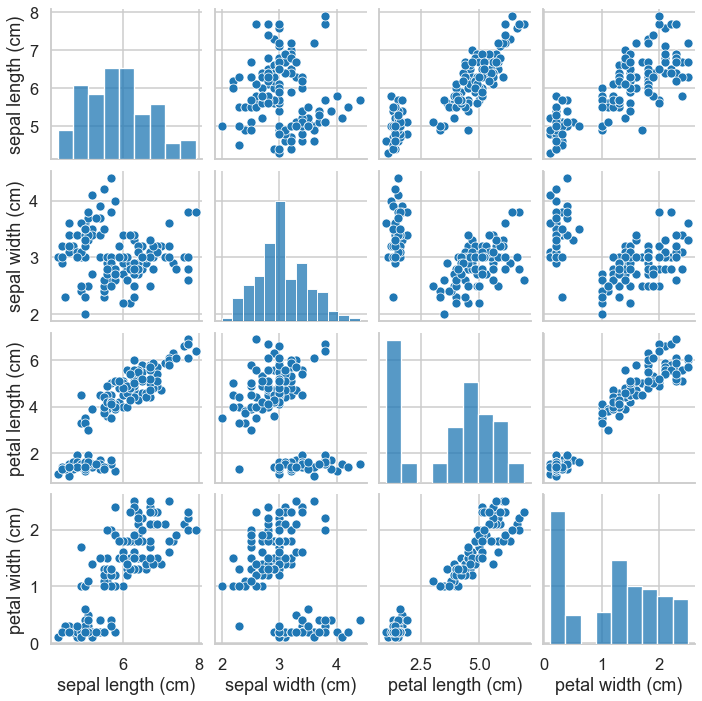

In [54]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(X, columns=iris_data.feature_names)
sns.pairplot(df)


<AxesSubplot:>

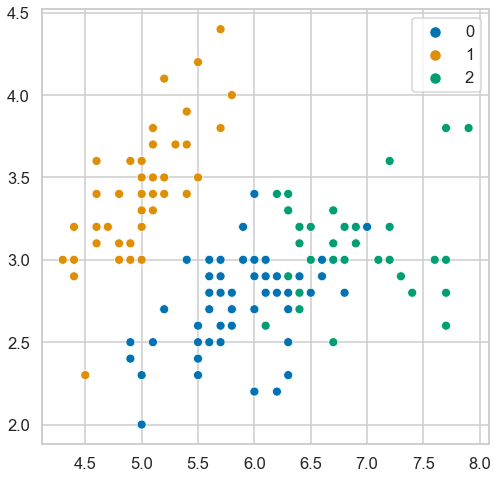

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

y_pred = kmeans.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

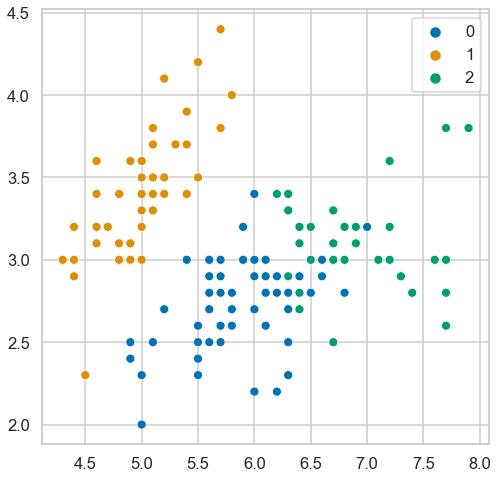

In [56]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit(X)

y_pred = agg.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

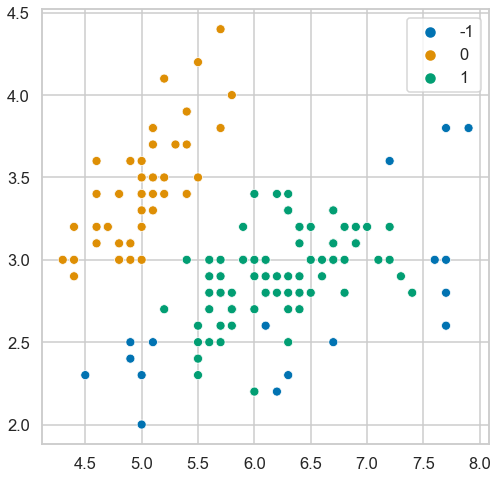

In [57]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

y_pred = dbscan.labels_

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


<AxesSubplot:>

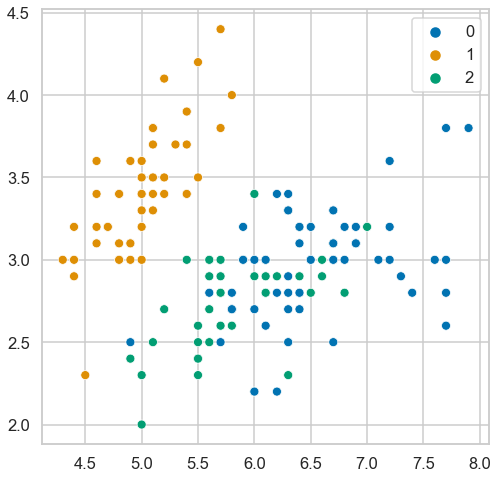

In [58]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

y_pred = gmm.predict(X)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred, palette='colorblind')


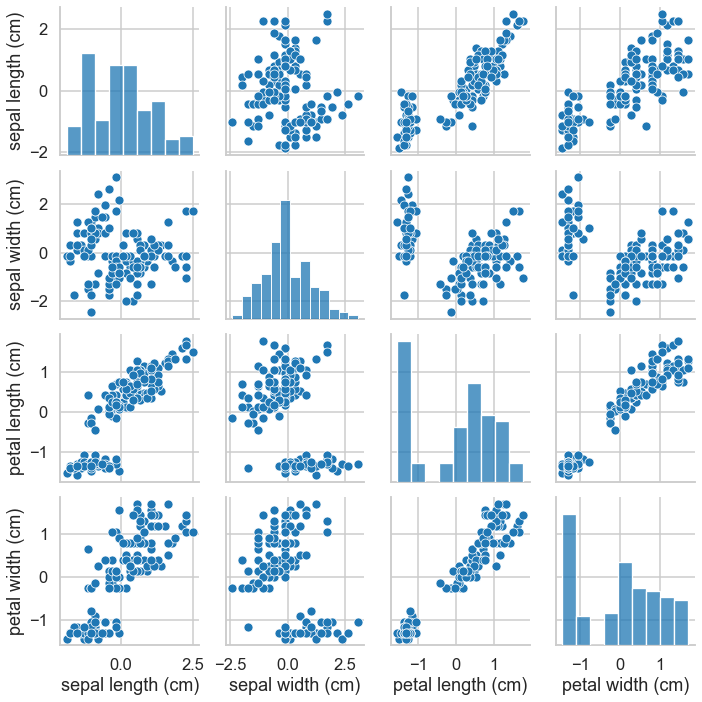

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

sns.pairplot(pd.DataFrame(X_norm, columns=iris_data.feature_names))


## Customer dataset
Repeat all the above on the customer data set 

In [86]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline


In [87]:
df = pd.read_csv(r'D:\GUC\Semester 10\Machine Learning\Assignments\3\Customer data.csv')


In [88]:
k_values = [2, 3, 4, 5, 6]
kmeans_models = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    kmeans_models.append(kmeans)
    print("KMeans with k={}: Inertia={}, Silhouette Score={}".format(k, kmeans.inertia_, silhouette_score(df, kmeans.labels_)))


KMeans with k=2: Inertia=1215187443459.6072, Silhouette Score=0.5828454744042287
KMeans with k=3: Inertia=673656005342.3237, Silhouette Score=0.5112466499756642
KMeans with k=4: Inertia=377713565022.90137, Silhouette Score=0.5411197716868612
KMeans with k=5: Inertia=249589875461.80426, Silhouette Score=0.537463429911508
KMeans with k=6: Inertia=177389840588.2639, Silhouette Score=0.5409606718436785


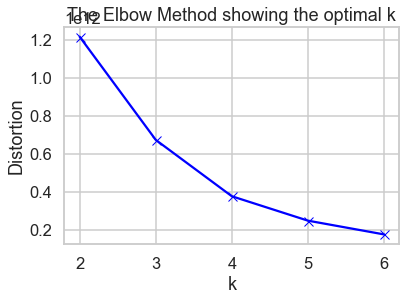

In [89]:
distortions = []

for kmeans in kmeans_models:
    distortions.append(kmeans.inertia_)

plt.plot(k_values, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


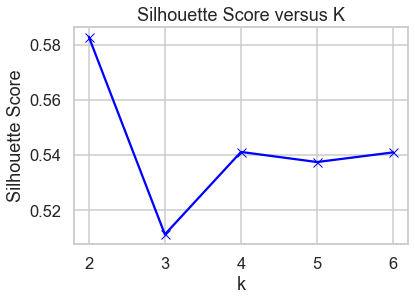

Best K for KMeans clustering: 2


In [90]:
silhouette_scores = []

for kmeans in kmeans_models:
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score versus K')
plt.show()

best_k = k_values[np.argmax(silhouette_scores)]
print("Best K for KMeans clustering: {}".format(best_k))


In [94]:
from sklearn.cluster import AgglomerativeClustering

# Define parameter combinations to try
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['average', 'single']
thresholds = [0, 2, 5, 8, 10, 12, 15, 20, 25, 30]

# Initialize variables to keep track of best model and score
best_score = -1
best_ac_model = None

for affinity in affinities:
    for linkage in linkages:
        for threshold in thresholds:
            ac_model = AgglomerativeClustering(n_clusters=None, affinity=affinity, linkage=linkage, distance_threshold=threshold)
            ac_model.fit(data)
            ac_score = silhouette_score(data, ac_model.labels_)
            print(f"Affinity: {affinity}, Linkage: {linkage}, Threshold: {threshold}, Silhouette Score: {ac_score}")
            if ac_score > best_score:
                best_score = ac_score
                best_ac_model = ac_model

# Plot the dendrogram for the best model
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    best_ac_model.children_,
    truncate_mode='level',
    p=3,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    )
plt.show()

cluster_labels = best_ac_model.labels_


ValueError: Number of labels is 2000. Valid values are 2 to n_samples - 1 (inclusive)

NameError: name 'best_ac_model' is not defined

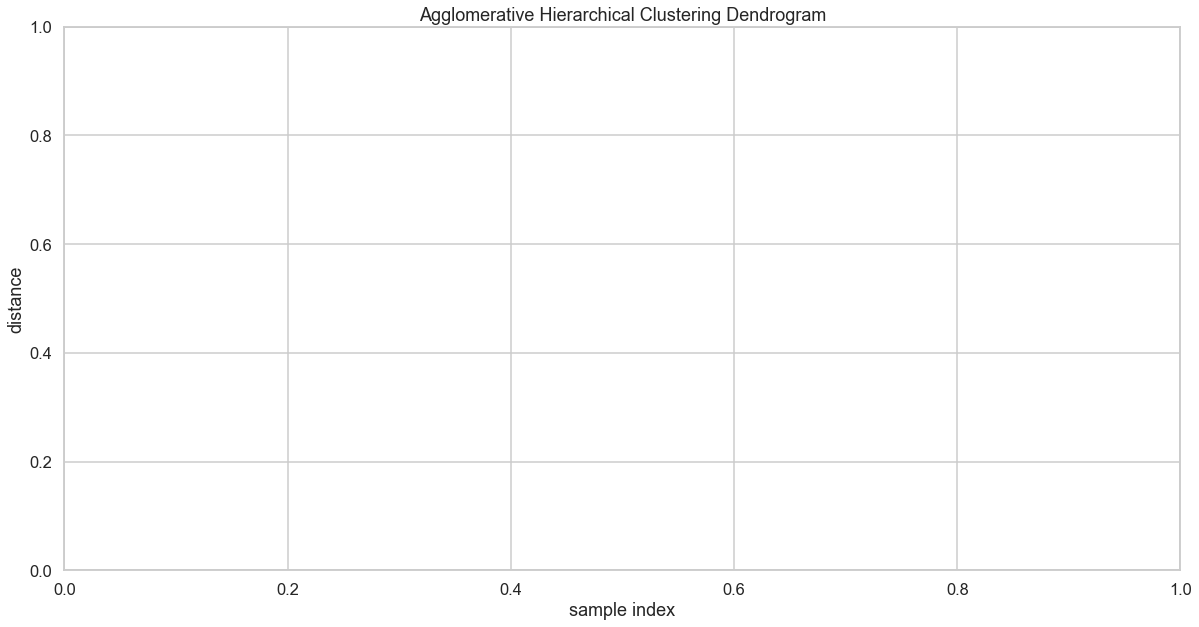

In [93]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(20, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    best_ac_model.children_,
    truncate_mode='level',
    p=3,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    )
plt.show()

cluster_labels = best_ac_model.labels_
